In [72]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("london_weather.csv")
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [73]:
# convert the 'date' column to a datetime object correctly 
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,2020-12-30,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [74]:
df.index = pd.DatetimeIndex(df['date']).to_period("M")

df_agg = df.groupby(pd.Grouper(freq="M")).agg({
    'precipitation': 'sum',    
    'cloud_cover': 'mean', 
    'global_radiation': 'mean', 
    'max_temp': 'mean', 
    'mean_temp': 'mean', 
    'min_temp': 'mean', 
    'pressure': 'mean'
})

df_agg.tail()


C:\Users\Kotori\AppData\Local\Temp\ipykernel_22968\487452407.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_agg = df.groupby(pd.Grouper(freq="M")).agg({
C:\Users\Kotori\AppData\Local\Temp\ipykernel_22968\487452407.py:3: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  df_agg = df.groupby(pd.Grouper(freq="M")).agg({


,precipitation,cloud_cover,global_radiation,max_temp,mean_temp,min_temp,pressure
date,,,,,,,
2020-08,56.2,5.000000,210.741935,25.200000,20.393333,15.738710,101224.193548
2020-09,19.2,4.200000,170.000000,21.693333,16.616667,11.580000,101695.000000
2020-10,143.6,5.774194,72.516129,14.970000,11.933333,9.038710,100804.516129
2020-11,49.8,5.933333,43.166667,12.636667,9.806667,7.026667,101939.000000
2020-12,72.4,5.466667,27.967742,8.325806,6.232258,4.187097,100303.870968


In [75]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

cloud_cover           19
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64


In [76]:
df["snow_depth"] = df["snow_depth"].fillna(0)
# This wasn't the best way to approach this; however, snow_depth is not a focus of our analysis.
# we will eventually drop snow_depth anyways
df = df.dropna()
#If I didn't do this, I kept getting this error "exog contains inf or nans" which wouldn't allow me to continue my analysis
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,,
1979-01,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2020-12,2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,0.0
2020-12,2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,0.0
2020-12,2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,0.0


In [77]:
# Set label and features
y = df['precipitation']                    
X = df.select_dtypes(np.number).assign(const=1)
X = X.drop(columns=['precipitation', "global_radiation", "snow_depth"])

# Run the multiple linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())  # View results

                            OLS Regression Results                            
Dep. Variable:          precipitation   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     468.3
Date:                Thu, 06 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:58:48   Log-Likelihood:                -40506.
No. Observations:               15261   AIC:                         8.103e+04
Df Residuals:                   15254   BIC:                         8.108e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
cloud_cover     0.1413      0.021      6.680      

In [78]:
from statsmodels.tsa.stattools import adfuller
stationarity = adfuller(df_agg['precipitation'], autolag='AIC')
print("P-value: ", stationarity[1])

P-value:  0.0


In [79]:
df_agg['precipitation_diff'] = df_agg['precipitation'].diff()
stationarity_diff = adfuller(df_agg['precipitation_diff'].dropna(), autolag='AIC')
print("P-value after differencing: ", stationarity_diff[1])


P-value after differencing:  1.7135581414076354e-17


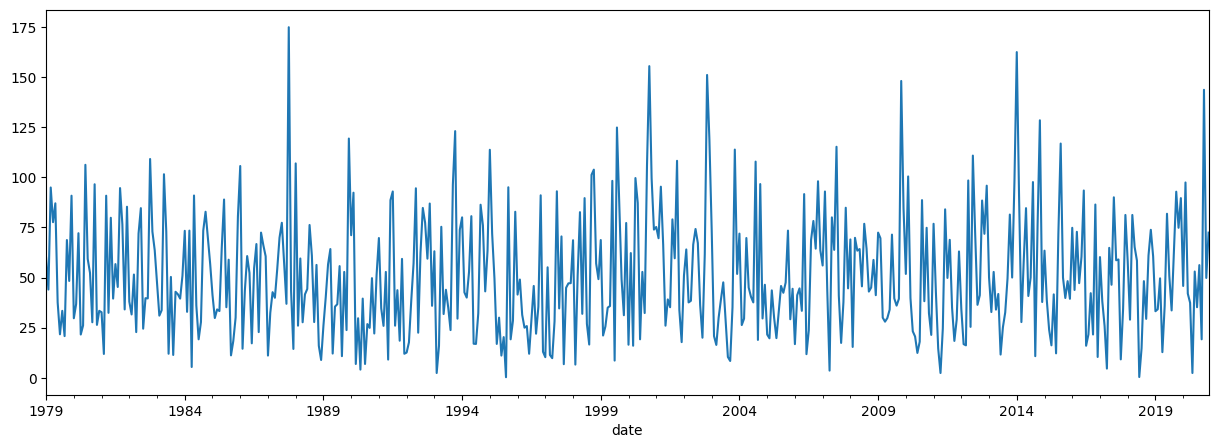

In [80]:
df_agg.precipitation.plot(figsize=(15,5));

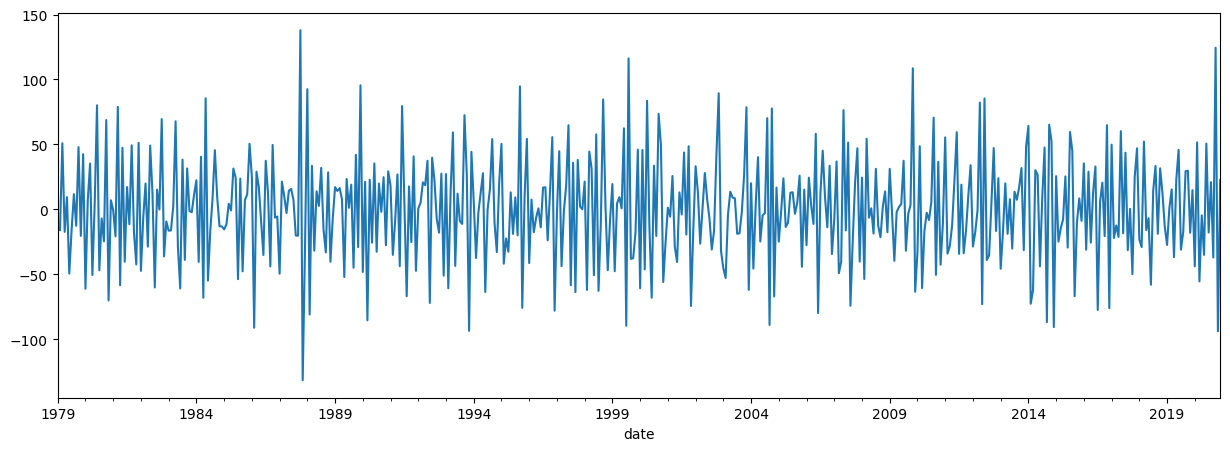

In [81]:
df_agg.precipitation_diff.plot(figsize=(15,5));

# Answers for questions

1) The variable I chose to predict was precipitation.
2) I checked for autocorrelation using the Durbin-Watson statistic, which came out to 1.889. Since a value between 1 and 2 means no autocorrelation, there doesn’t seem to be a problem here.
3) Yes, the data is already stationary. I confirmed this using the Augmented Dickey-Fuller (ADF) test, which gave a p-value of 0.00.
4) Though I didn't need to make any adjustments, I ran the .diff command to see what the results would be anyways. The ADF test shown above already led us to believe it was stationary by the p-value of 0.00.
4) There’s no obvious long-term trend in precipitation. The data fluctuates but stays within a pretty consistent range from the late 1970s to the late 2010s. It doesn’t look like there’s a steady increase or decrease over time, just normal variation.
